In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress


In [2]:
raw_df = pd.read_csv("adult.csv")
raw_df.shape

(32561, 15)

In [3]:
raw_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
for col in raw_df.columns: 
    print(col) 

age
workclass
fnlwgt
education
education.num
marital.status
occupation
relationship
race
sex
capital.gain
capital.loss
hours.per.week
native.country
income


In [5]:
replaced_df = raw_df.replace(to_replace="?", value="NA")
replaced_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NA,77053,HS-grad,9,Widowed,NA,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NA,186061,Some-college,10,Widowed,NA,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
for cols in replaced_df.select_dtypes(exclude=np.number).columns:
    print(cols, ':', replaced_df[cols].unique(), end='\n\n')


workclass : ['NA' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc'
 'Self-emp-inc' 'Local-gov' 'Without-pay' 'Never-worked']

education : ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

marital.status : ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

occupation : ['NA' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

relationship : ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

race : ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

sex : ['Female' 'Male']

native.country : ['United-States' 'NA' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philip

# Over and under 50k dataframes

In [7]:
over_50k_df = replaced_df[replaced_df["income"] == ">50K"]
over_50k_df.shape

(7841, 15)

In [8]:
under_50k_df = replaced_df[replaced_df["income"] == "<=50K"]
under_50k_df.shape

(24720, 15)

# Gender

In [9]:
gender_over_50k = over_50k_df["sex"].value_counts()

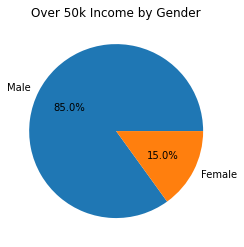

In [11]:
gender_over_50k.plot(kind="pie", autopct="%1.1f%%")
plt.title("Over 50k Income by Gender")
plt.ylabel("")
plt.show()

In [10]:
gender_under_50k = replaced_df["sex"][replaced_df["income"] == "<=50K"].value_counts()

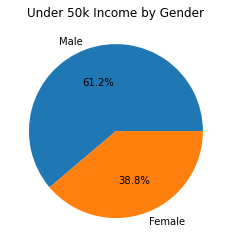

In [12]:
gender_under_50k.plot(kind="pie", autopct="%1.1f%%")
plt.title("Under 50k Income by Gender")
plt.ylabel("")
plt.show()

# Education

In [13]:
education_over_50k = replaced_df["education.num"][replaced_df["income"] == ">50K"]
education_under_50k = replaced_df["education.num"][replaced_df["income"] == "<=50K"]

## With outliers

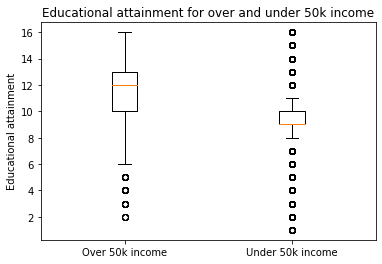

In [14]:
graph = [education_over_50k, education_under_50k]
labels = ["Over 50k income", "Under 50k income"]
fig1, ax1 = plt.subplots()
ax1.set_title("Educational attainment for over and under 50k income")
ax1.set_ylabel("Educational attainment")
ax1.boxplot(graph, labels=labels)
plt.show()

In [15]:
stats.ttest_ind(education_over_50k, education_under_50k, equal_var=False)

Ttest_indResult(statistic=64.8960188335867, pvalue=0.0)

## Outliers removed

In [16]:
quartiles = education_over_50k.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Education values below {round(lower_bound, 2)} and above \
{round(upper_bound, 2)} could be outliers.")

Education values below 5.5 and above 17.5 could be outliers.


In [17]:
outliers_below = over_50k_df[over_50k_df["education.num"] < lower_bound].index.tolist()
print(outliers_below)

[197, 479, 597, 742, 774, 963, 1655, 2541, 2609, 2633, 2724, 2731, 2775, 2900, 2970, 2971, 2980, 3014, 3050, 3066, 3291, 4390, 4415, 4749, 5956, 6093, 6145, 6658, 7508, 7582, 7895, 8023, 8344, 8617, 8788, 8861, 8897, 9596, 9866, 9955, 10831, 10961, 11510, 11872, 12227, 12739, 12862, 13172, 13240, 14187, 15106, 15121, 15156, 15561, 15705, 16128, 16610, 16796, 18066, 18351, 20376, 20706, 21386, 21721, 21909, 22589, 22716, 23440, 23519, 24639, 25370, 25978, 26130, 27101, 27874, 28598, 28709, 28969, 29196, 29303, 29499, 29619, 29678, 29748, 29813, 29821, 31506, 32142, 32255]


In [18]:
over_50k_clean_df=over_50k_df.drop(outliers_below)
over_50k_clean_df.shape

(7752, 15)

In [19]:
outliers_above = over_50k_clean_df[over_50k_clean_df["education.num"] > upper_bound].index.tolist()
print(outliers_above)

[]


In [20]:
quartiles1 = education_under_50k.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"Education values below {round(lower_bound1, 2)} and above \
{round(upper_bound1, 2)} could be outliers.")

Education values below 7.5 and above 11.5 could be outliers.


In [21]:
outliers_below1 = under_50k_df[under_50k_df["education.num"] < lower_bound1].index.tolist()
print(outliers_below1)

[3, 6, 21, 26, 27, 142, 145, 161, 195, 212, 215, 216, 218, 219, 224, 226, 240, 241, 247, 269, 271, 277, 278, 282, 283, 305, 336, 347, 643, 682, 898, 932, 994, 1002, 1004, 1019, 1075, 1081, 1083, 1092, 1098, 1106, 1110, 1116, 1117, 1118, 1124, 1129, 1136, 1153, 1181, 1183, 1184, 1185, 1186, 1188, 1194, 1220, 1231, 1232, 1235, 1236, 1239, 1241, 1242, 1243, 1246, 1250, 1253, 1254, 1256, 1258, 1259, 1267, 1268, 1282, 1297, 1319, 1329, 1334, 1395, 1434, 1465, 1483, 1490, 1504, 1508, 1518, 1678, 1680, 2245, 2922, 2935, 2936, 2957, 2966, 3111, 3130, 3133, 3188, 3221, 3260, 3261, 3265, 3266, 3275, 3300, 3384, 3389, 3390, 3418, 3423, 3424, 3427, 3428, 3434, 3444, 3454, 3474, 3479, 3485, 3486, 3489, 3491, 3498, 3501, 3507, 3527, 3529, 3538, 3541, 3544, 3545, 3550, 3553, 3556, 3557, 3558, 3560, 3624, 3626, 3640, 3648, 3759, 3765, 3772, 3773, 3778, 3780, 3782, 3783, 3785, 3788, 3793, 3811, 3817, 3834, 3842, 3846, 3847, 3851, 3854, 3855, 3857, 3859, 3862, 3865, 3885, 3887, 3889, 3891, 3892, 3894, 3

In [22]:
under_50k_clean_df=under_50k_df.drop(outliers_below1)
under_50k_clean_df.shape

(21111, 15)

In [23]:
outliers_above1 = under_50k_clean_df[under_50k_clean_df["education.num"] > upper_bound1].index.tolist()
print(outliers_above1)

[135, 143, 146, 148, 149, 154, 157, 158, 162, 167, 171, 177, 179, 203, 204, 208, 227, 237, 243, 244, 259, 276, 284, 286, 287, 289, 290, 291, 294, 295, 300, 304, 306, 307, 316, 322, 327, 328, 330, 333, 334, 337, 516, 523, 524, 531, 576, 658, 896, 900, 901, 904, 906, 907, 908, 910, 915, 917, 918, 919, 920, 922, 925, 927, 928, 929, 930, 931, 1000, 1003, 1010, 1011, 1013, 1014, 1015, 1016, 1017, 1021, 1023, 1025, 1027, 1028, 1029, 1032, 1034, 1036, 1039, 1044, 1045, 1052, 1055, 1058, 1060, 1061, 1063, 1064, 1068, 1077, 1080, 1090, 1100, 1109, 1115, 1131, 1137, 1149, 1152, 1159, 1161, 1163, 1168, 1170, 1172, 1173, 1174, 1175, 1177, 1179, 1180, 1192, 1195, 1206, 1213, 1237, 1263, 1270, 1273, 1276, 1280, 1283, 1284, 1285, 1287, 1290, 1292, 1295, 1300, 1303, 1304, 1306, 1309, 1312, 1320, 1330, 1365, 1378, 1379, 1410, 1414, 1416, 1419, 1420, 1421, 1425, 1435, 1436, 1437, 1440, 1441, 1443, 1448, 1449, 1450, 1455, 1457, 1459, 1461, 1464, 1467, 1468, 1469, 1470, 1471, 1472, 1476, 1477, 1480, 1481,

In [24]:
under_50k_clean_df=under_50k_clean_df.drop(outliers_above1)
under_50k_clean_df.shape

(16151, 15)

In [25]:
education_over_50k_clean = over_50k_clean_df["education.num"]
education_under_50k_clean = under_50k_clean_df["education.num"]

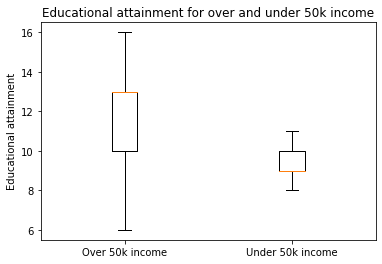

In [26]:
graph = [education_over_50k_clean, education_under_50k_clean]
labels = ["Over 50k income", "Under 50k income"]
fig1, ax1 = plt.subplots()
ax1.set_title("Educational attainment for over and under 50k income")
ax1.set_ylabel("Educational attainment")
ax1.boxplot(graph, labels=labels)
plt.show()

In [27]:
stats.ttest_ind(education_over_50k_clean, education_under_50k_clean, equal_var=False)

Ttest_indResult(statistic=85.56558323984719, pvalue=0.0)

# Workhours

In [28]:
workhours_over_50k = replaced_df["hours.per.week"][replaced_df["income"] == ">50K"]
workhours_under_50k = replaced_df["hours.per.week"][replaced_df["income"] == "<=50K"]

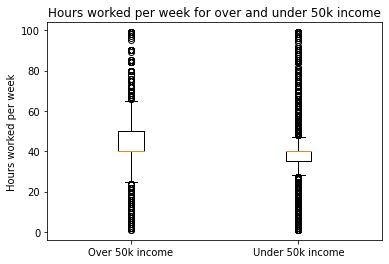

In [29]:
graph = [workhours_over_50k, workhours_under_50k]
labels = ["Over 50k income", "Under 50k income"]
fig1, ax1 = plt.subplots()
ax1.set_title("Hours worked per week for over and under 50k income")
ax1.set_ylabel("Hours worked per week")
ax1.boxplot(graph, labels=labels)
plt.show()

In [30]:
stats.ttest_ind(workhours_over_50k, workhours_under_50k, equal_var=False)

Ttest_indResult(statistic=45.123095093109875, pvalue=0.0)

# Age

In [34]:
age_over_50k = over_50k_df["age"]
age_under_50k = under_50k_df["age"]

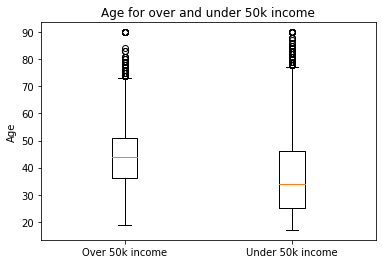

In [35]:
graph = [age_over_50k, age_under_50k]
labels = ["Over 50k income", "Under 50k income"]
fig1, ax1 = plt.subplots()
ax1.set_title("Age for over and under 50k income")
ax1.set_ylabel("Age")
ax1.boxplot(graph, labels=labels)
plt.show()

In [36]:
stats.ttest_ind(age_over_50k, age_under_50k, equal_var=False)

Ttest_indResult(statistic=50.264210024707836, pvalue=0.0)

# Age and Education correlation

In [39]:
age = replaced_df["age"]

In [40]:
education = replaced_df["education.num"]

The r-squared is: 0.001334235570146718


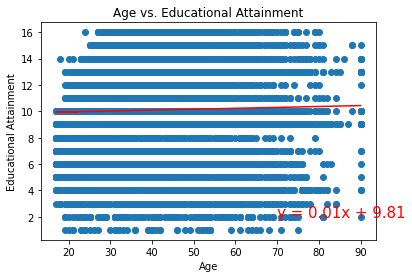

In [44]:
x_values = age
y_values = education
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,2),fontsize=15,color="red")
plt.title("Age vs. Educational Attainment")
plt.xlabel("Age")
plt.ylabel("Educational Attainment")
plt.show()

# Workplace type employment

In [48]:
workclass_over_50k = over_50k_df["workclass"].value_counts()

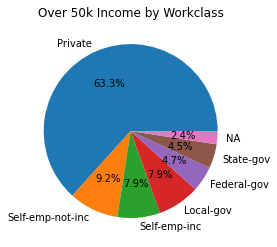

In [49]:
workclass_over_50k.plot(kind="pie", autopct="%1.1f%%")
plt.title("Over 50k Income by Workclass")
plt.ylabel("")
plt.show()

In [50]:
workclass_under_50k = under_50k_df["workclass"].value_counts()

# Income by workclass

## Private sector income

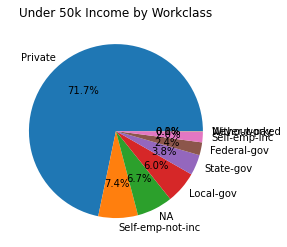

In [51]:
workclass_under_50k.plot(kind="pie", autopct="%1.1f%%")
plt.title("Under 50k Income by Workclass")
plt.ylabel("")
plt.show()

In [56]:
private_income = replaced_df["income"][replaced_df["workclass"] == "Private"].value_counts()

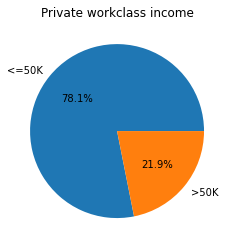

In [57]:
private_income.plot(kind="pie", autopct="%1.1f%%")
plt.title("Private workclass income")
plt.ylabel("")
plt.show()

## Local gov income

In [58]:
local_gov_income = replaced_df["income"][replaced_df["workclass"] == "Local-gov"].value_counts()

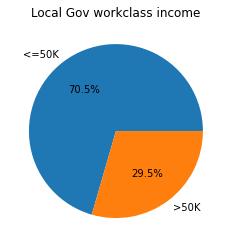

In [59]:
local_gov_income.plot(kind="pie", autopct="%1.1f%%")
plt.title("Local Gov workclass income")
plt.ylabel("")
plt.show()